<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220314_cv2_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# KMeans를 활용한 16컬러 군집화

In [12]:
import numpy as np
import cv2

K = 16 # 군집화 개수(16컬러)
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/taekwonv1.jpg') # shape : (444, 400, 3)
data = img.reshape(-1, 3).astype(np.float32) # 모든 픽셀을 [B, G, R]로 줄을 세움 → shape : (177600, 3), float32타입, N X 1 형태
# 반복 중지 요건 : tuple형식 (type, max_iter, epsilon)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# 평균 클러스터링 적용
ret, label, center = cv2.kmeans(data, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [13]:
ret # 중앙점과 각 데이터의 거리의 합의 제곱 : 최소화 시켜야 하는 대상

49491713.6797529

In [14]:
label # 클러스터링 된 결과 : 16군집 중 어디에 해당하는지 구분된 결과

array([[ 8],
       [ 8],
       [ 8],
       ...,
       [13],
       [13],
       [13]], dtype=int32)

In [15]:
center # 16개 각 군집의 중심점, shape : (16, 3)

array([[  9.799545, 139.05637 , 179.51091 ],
       [ 10.60776 , 106.75416 , 134.86143 ],
       [ 74.68266 ,  76.206665, 184.08533 ],
       [126.934006,  71.9809  ,  29.340536],
       [155.46149 , 152.4339  , 143.1333  ],
       [171.79176 ,  99.87243 ,  27.09098 ],
       [142.88437 , 118.70366 ,  75.54362 ],
       [ 55.76773 ,  23.33957 ,   8.966485],
       [189.4264  , 191.3948  , 190.3163  ],
       [ 75.16848 ,  61.82918 ,  53.30817 ],
       [204.66626 , 142.83733 ,  63.867405],
       [ 19.68682 ,  17.45282 , 149.09967 ],
       [ 99.6264  ,  48.96435 ,  17.980848],
       [209.21863 , 212.2919  , 213.93188 ],
       [ 90.04011 , 109.472824, 101.31715 ],
       [ 42.51644 , 181.98082 , 200.2959  ]], dtype=float32)

In [16]:
center = np.uint8(center) # 각 군집의 중심점을 정수형으로 변환 : 16가지의 색상 [B, G, R]
center

array([[  9, 139, 179],
       [ 10, 106, 134],
       [ 74,  76, 184],
       [126,  71,  29],
       [155, 152, 143],
       [171,  99,  27],
       [142, 118,  75],
       [ 55,  23,   8],
       [189, 191, 190],
       [ 75,  61,  53],
       [204, 142,  63],
       [ 19,  17, 149],
       [ 99,  48,  17],
       [209, 212, 213],
       [ 90, 109, 101],
       [ 42, 181, 200]], dtype=uint8)

In [18]:
label.flatten() # (177600, 1) → (177600, ) : 차원을 줄여줌

(177600,)

In [23]:
res = center[label.flatten()] # shape : (177600, 3)
res

array([[189, 191, 190],
       [189, 191, 190],
       [189, 191, 190],
       ...,
       [209, 212, 213],
       [209, 212, 213],
       [209, 212, 213]], dtype=uint8)

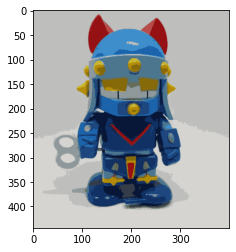

In [24]:
dst = res.reshape(img.shape)
import matplotlib.pyplot as plt

plt.imshow(dst[:,:,::-1])
